# Mini Project 1

Using a custom.yaml, hybrid.yaml and simple.yaml for EUGENE Dataset

In [1]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install git+https://github.com/ML4GLand/EUGENe.git

  Cloning https://github.com/ML4GLand/EUGENe.git to /tmp/pip-req-build-suisms5z
  Running command git clone --filter=blob:none --quiet https://github.com/ML4GLand/EUGENe.git /tmp/pip-req-build-suisms5z
  Resolved https://github.com/ML4GLand/EUGENe.git to commit 0f445cd2513cf274e20f7b5d11eaf08049d6200c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
import eugene

In [5]:
!git clone https://github.com/ML4GLand/EUGENe.git

Cloning into 'EUGENe'...
remote: Enumerating objects: 8088, done.
remote: Counting objects: 100% (972/972), done.
remote: Compressing objects: 100% (396/396), done.
remote: Total 8088 (delta 571), reused 922 (delta 566), pack-reused 7116 (from 1)
Receiving objects: 100% (8088/8088), 110.23 MiB | 12.38 MiB/s, done.
Resolving deltas: 100% (5519/5519), done.


In [6]:
import sys
sys.path.append('/content/drive/MyDrive/EUGENe')

## Configuring

To make the sometimes painful process of keeping track of global parameters and input/output file paths easier, we usually like to set these through EUGENE's `settings` up front. This will control the default directories for things like:

- Data downloads with `seqdatasets`
- Model configuration files (i.e. EUGENe will know where to look for these files without you having to specify the full path every time)
- Model logs, checkpoints, and predictions
- Figures and plots

These small quality of life features can go a long way to preserve your sanity!

In [7]:
import os
os.chdir("/content/drive/MyDrive/EUGENe")
cwd = os.getcwd()
cwd

'/content'

In [8]:
# Configure EUGENe directories, if you do not set these, EUGENe will use the default directories
from eugene import settings

## Dataloading
For this tutorial, we will reproduce the prediction of promoter activity featured in [Jores et al., 2021](https://www.nature.com/articles/s41477-021-00932-y) that uses DNA sequences as input to predict [STARR-seq activity](https://en.wikipedia.org/wiki/STARR-seq). We first need to load this dataset. If the dataset is a "EUGENe benchmarking dataset", it can be loaded in through the `SeqDatasets` [subpackage](https://eugene-tools.readthedocs.io/en/latest/usage-principles.html#seqdatasets-access-to-common-datasets). Let's load the package first

In [9]:
import seqdatasets

We can next use the `get_dataset_info()` function to get information about the datasets available as "EUGENe benchmarking datasets".

In [10]:
# Check the dataset
seqdatasets.get_dataset_info()

,n_seqs,n_targets,metadata,url,description,author
dataset_name,,,,,,
random1000,1000,1,10 randomly generated binary labels (label_{0-...,https://github.com/cartercompbio/EUGENe/tree/m...,A randomly generated set of 1000 sequences wit...,Adam Klie (aklie@eng.ucsd.edu)
ray13,241357,244,"probe set (Probe_Set), bidning intensity value...",http://hugheslab.ccbr.utoronto.ca/supplementar...,This dataset represents an in vitro RNA bindin...,Hayden Stites (haydencooperstites@gmail.com)
farley15,163708,2,"barcode (Barcode), RPMs from each biological r...",https://zenodo.org/record/6863861#.YuG15uxKg-Q,This dataset represents SEL-seq data of C. int...,Adam Klie (aklie@eng.ucsd.edu)
deBoer20,100000000+,1,Variable depending on chosen file,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,Gigantic parallel reporter assay data from ~10...,Adam Klie (aklie@eng.ucsd.edu)
jores21,147966,1,"set (set), species (sp), gene promoter came fr...",https://raw.githubusercontent.com/tobjores/Syn...,"This datast includes activity scores for 79,83...",Adam Klie (aklie@eng.ucsd.edu)
deAlmeida22,484052,4,Normalized enrichment scores for developmental...,https://zenodo.org/record/5502060/,This dataset includes UMI-STARR-seq data from ...,Adam Klie (aklie@eng.ucsd.edu)


We are in luck! The plant promoter dataset is available via the `jores21()` command. If you are requesting this dataset for the for the first time, it will be downloaded and loaded into a `SeqData` object automagically (and downloaded to your `settings.dataset_dir`).

In [11]:
# Download the dataset to the dataset dir. We are using the promoters assayed in leaf promoters here
sdata = seqdatasets.jores21()
sdata

Path /content/eugene_data/jores21 does not exist, creating new folder.
Finished downloading CNN_test_leaf.tsv
Finished downloading CNN_train_leaf.tsv
Zarr file not found. Creating new zarr file.


72158it [00:01, 51705.36it/s]


<xarray.Dataset>
Dimensions:     (_sequence: 72158, _length: 170)
Dimensions without coordinates: _sequence, _length
Data variables:
    enrichment  (_sequence) float64 dask.array<chunksize=(1000,), meta=np.ndarray>
    gene        (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(1000, 170), meta=np.ndarray>
    set         (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>
    sp          (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>

If you want to learn more about how you can use EUGENe to read from your standard genomics file formats or how we represents datasets in memory and on disk, check out the `SeqData` section of the [usage principles](https://eugene-tools.readthedocs.io/en/latest/usage-principles.html#seqdata) and the `SeqData` subpackage.

## Data Visualization
Data visualization is a key part of the EUGENe workflow. We can use the `plot` module to visualize aspects of our data such as the distribution of targets.

In [12]:
from eugene import plot as pl

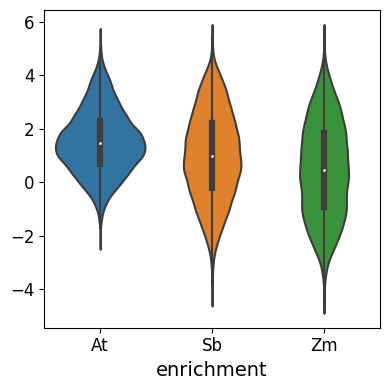

In [13]:
# Plot the distribution of targets across the different species the promoters were derived from
pl.violinplot(sdata, vars=["enrichment"], groupby="sp", figsize=(4, 4))

## Preprocessing
Now that we have our data loaded in, we can preprocess it using EUGENe's `preprocess` module. This module wraps functionality from the `SeqPro` [subpackage](https://eugene-tools.readthedocs.io/en/latest/usage-principles.html#sequence-manipulation-is-handled-efficiently-by-seqpro) and includes several functions for common sequence preprocessing tasks.

### Sequence preprocessing
Our first preprocessing step will be to one-hot encode our sequences. One-hot encoding is a common way to represent sequences as a matrix of 0s and 1s for model training. We will pass in DNA as the vocab explicitly, but this is the default if not specified.

In [14]:
from eugene import preprocess as pp

In [15]:
# One hot encode all the sequences in the sdata using the wrapper function
pp.ohe_seqs_sdata(sdata, alphabet="DNA")

Let's also quickly set-up some identifiers for our sequences. This will come in handy during interpretation when we often want to visualize the importance of specific sequences.

In [16]:
# Make unique ids for each sequence in the sdata
pp.make_unique_ids_sdata(sdata)

### Dataset preprocessing
As is standard machine learning practice, we also need to split our data into training, validation, and test sets. This dataset comes with 'train' and 'test' labels in the 'set' annotation.

In [17]:
# Split into train and test sets
sdata_train = sdata.sel(_sequence=(sdata["set"] == "train").compute())
sdata_test = sdata.sel(_sequence=(sdata["set"] == "test").compute())

We also need to split the training sequences into train and validation sets. We can do this using EUGENe's `train_test_random_split` function

In [18]:
# Split the training set into training and validation
pp.train_test_random_split(sdata_train, dim="_sequence", train_var="train_val", test_size=0.3)

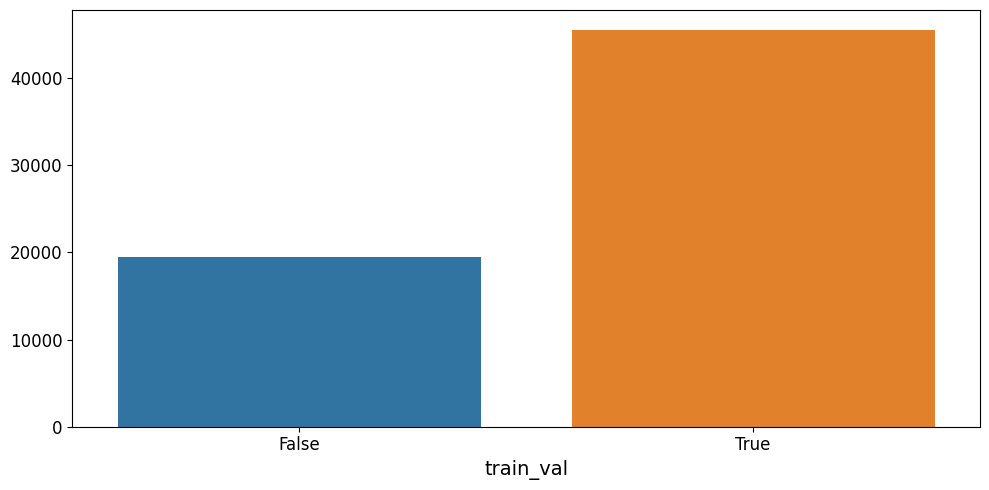

In [19]:
# Check the split with a count plot
pl.countplot(sdata_train, vars="train_val", orient="h")

## Training
Now that we have our data ready, it's time to train our model! Training in EUGENe is done through the [PyTorch Lightning (PL) framework](https://www.pytorchlightning.ai/index.html). However PyTorch Lightning does not offer us much help with instantiating model architectures and initializing them. We will utilize EUGENE's library of neural network parts and architectures to do this.

### Instantiation and initialization
We first need to instantiate and initialize our model. We can use the `models` [module](https://eugene-tools.readthedocs.io/en/latest/usage-principles.html#models-instantiate-and-initialize-neural-network-architectures) to do this.

In [20]:
from eugene import models

In [83]:
!wget https://raw.githubusercontent.com/ML4GLand/tutorials/main/configs/simple_cnn.yaml

--2024-10-03 03:49:09--  https://raw.githubusercontent.com/ML4GLand/tutorials/main/configs/simple_cnn.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 508 [text/plain]
Saving to: ‘simple_cnn.yaml’

simple_cnn.yaml     100%[===================>]     508  --.-KB/s    in 0s      

2024-10-03 03:49:09 (27.0 MB/s) - ‘simple_cnn.yaml’ saved [508/508]



In [24]:
import os
print(os.listdir())

['.config', 'deepbind.yaml', 'EUGENe', 'drive', 'hybrid.yaml', 'eugene_data', 'sample_data']


In [70]:
model1 = models.load_config("custom.yaml")

In [71]:
model2 = models.load_config("hybrid.yaml")

In [86]:
model3 = models.load_config("simple_cnn.yaml")

### Model fitting

Used 3 models

In [54]:
from eugene import train

In [87]:
models.init_weights(model1)
models.init_weights(model2)
models.init_weights(model3)

In [74]:
train.fit_sequence_module(
    model=model1,
    sdata=sdata_train,
    seq_var="ohe_seq",
    target_vars=["enrichment"],
    in_memory=True,
    train_var="train_val",
    epochs=25,
    batch_size=32,
    num_workers=4,
    prefetch_factor=2,
    drop_last=False,
    name="hybrid",
    version="tutorial_model",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)


Dropping 0 sequences with NaN targets.
Loading ohe_seq and ['enrichment'] into memory
No seed set


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/eugene_logs/hybrid/tutorial_model/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INF

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [57]:
train.fit_sequence_module(
    model=model2,
    sdata=sdata_train,
    seq_var="ohe_seq",
    target_vars=["enrichment"],
    in_memory=True,
    train_var="train_val",
    epochs=25,
    batch_size=32,
    num_workers=4,
    prefetch_factor=2,
    drop_last=False,
    name="hybrid",
    version="tutorial_model",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type    | Params | Mode 
-------------------------------------------------
0 | arch         | Hybrid  | 1.9 M  | train
1 | train_m

Dropping 0 sequences with NaN targets.
Loading ohe_seq and ['enrichment'] into memory
No seed set


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_

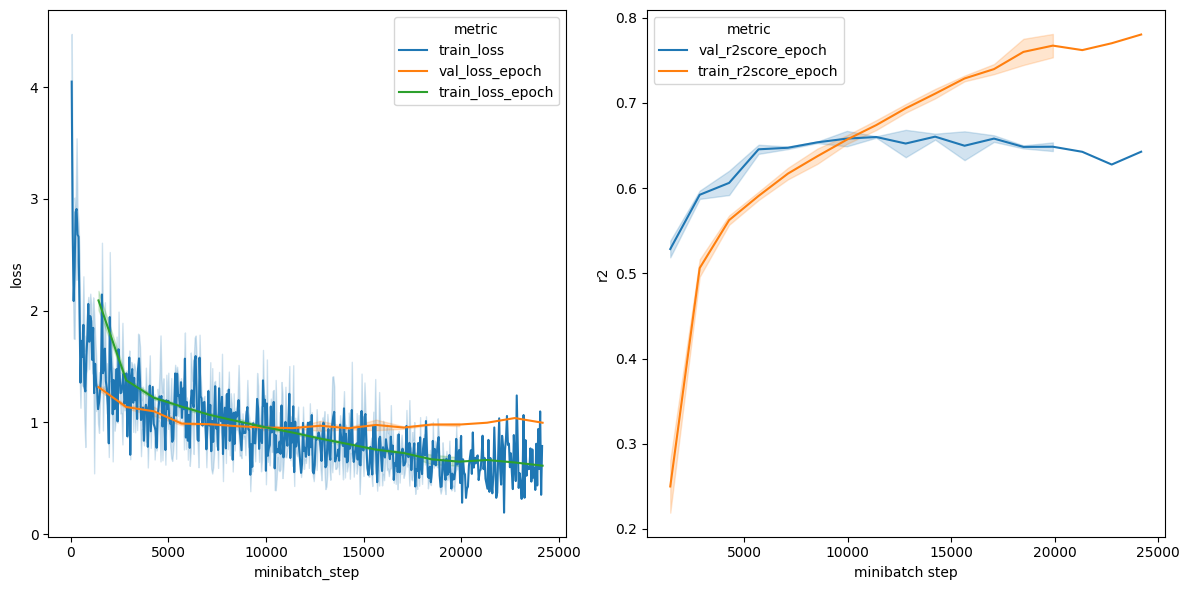

In [76]:
# Plot a loss curve and an r2 curve as a metric # Custom
pl.training_summary(os.path.join(settings.logging_dir, "hybrid", "tutorial_model"), metric="r2")

/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_

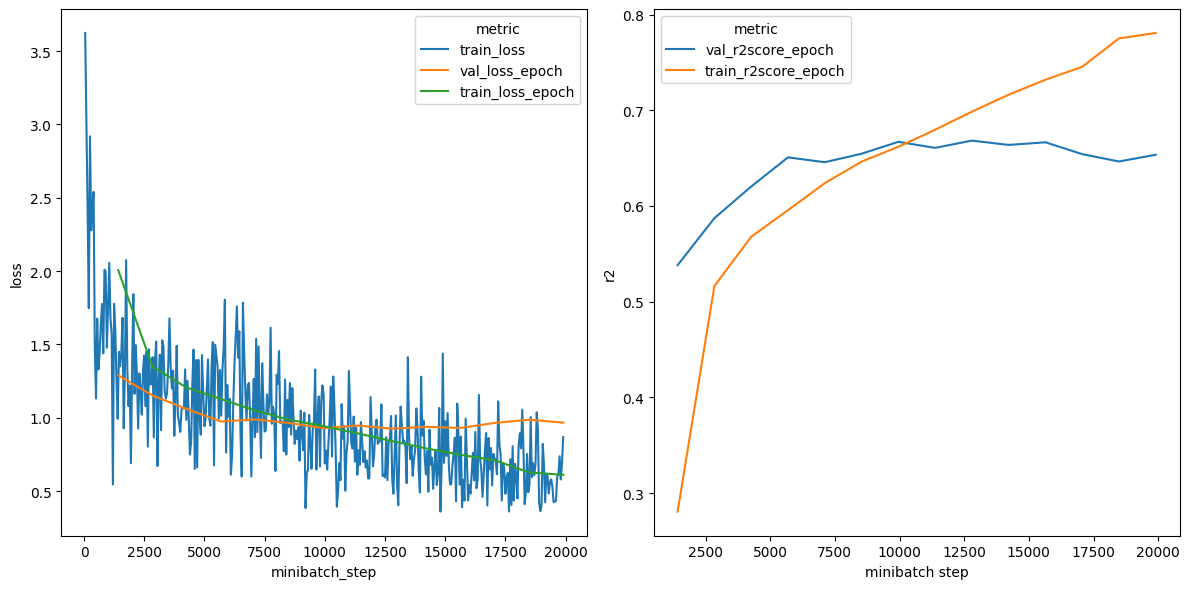

In [58]:
# Plot a loss curve and an r2 curve as a metric
pl.training_summary(os.path.join(settings.logging_dir, "hybrid", "tutorial_model"), metric="r2")

In [ ]:
# Plot a loss curve and an r2 curve as a metric
pl.training_summary(os.path.join(settings.logging_dir, "simple_cnn", "tutorial_model"), metric="r2")

## Evaluation
After the model's been trained, we can evaluate our performance on our held-out test data. This is done through the `evaluate` [module](https://eugene-tools.readthedocs.io/en/latest/usage-principles.html#evaluate-validate-and-explore-models-on-new-data).

In [60]:
from eugene import evaluate

We want to use our best model for evaluation. We can see from the training curve above that our model began overfitting the data after about 3000 training steps. Lucky for us, PyTorch Lightning keeps track of our best model for us! We can load this model in from the log directory like so

In [61]:
# We will use the glob Python library to help us find the path to our model
import glob

In [64]:
# We point to the checkpoints directory within the logging directory to grab the best model
model_file2 = glob.glob(os.path.join(settings.logging_dir, "hybrid", "tutorial_model", "checkpoints", "*"))[0]
best_model2 = models.SequenceModule.load_from_checkpoint(model_file2, arch=model2.arch)

In [78]:
model_file1 = glob.glob(os.path.join(settings.logging_dir, "simple_cnn", "tutorial_model", "checkpoints", "*"))[0]
best_model1 = models.SequenceModule.load_from_checkpoint(model_file1, arch=model1.arch)


RuntimeError: Error(s) in loading state_dict for SequenceModule:
	Missing key(s) in state_dict: "arch.recurrent_block.layers.weight_ih_l1", "arch.recurrent_block.layers.weight_hh_l1", "arch.recurrent_block.layers.bias_ih_l1", "arch.recurrent_block.layers.bias_hh_l1", "arch.dense_block.layers.7.weight", "arch.dense_block.layers.7.bias", "arch.dense_block.layers.7.running_mean", "arch.dense_block.layers.7.running_var", "arch.dense_block.layers.8.weight", "arch.dense_block.layers.8.bias". 
	size mismatch for arch.conv1d_tower.layers.0.weight: copying a param with shape torch.Size([256, 4, 13]) from checkpoint, the shape in current model is torch.Size([512, 4, 13]).
	size mismatch for arch.conv1d_tower.layers.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.4.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.4.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.4.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.5.weight: copying a param with shape torch.Size([256, 256, 13]) from checkpoint, the shape in current model is torch.Size([512, 512, 13]).
	size mismatch for arch.conv1d_tower.layers.5.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.9.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.9.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.9.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.9.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.10.weight: copying a param with shape torch.Size([256, 256, 13]) from checkpoint, the shape in current model is torch.Size([512, 512, 13]).
	size mismatch for arch.conv1d_tower.layers.10.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.14.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.14.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.14.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.conv1d_tower.layers.14.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for arch.recurrent_block.layers.weight_ih_l0: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([1024, 512]).
	size mismatch for arch.recurrent_block.layers.weight_hh_l0: copying a param with shape torch.Size([512, 128]) from checkpoint, the shape in current model is torch.Size([1024, 256]).
	size mismatch for arch.recurrent_block.layers.bias_ih_l0: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for arch.recurrent_block.layers.bias_hh_l0: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for arch.dense_block.layers.0.weight: copying a param with shape torch.Size([64, 128]) from checkpoint, the shape in current model is torch.Size([128, 256]).
	size mismatch for arch.dense_block.layers.0.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for arch.dense_block.layers.3.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for arch.dense_block.layers.3.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for arch.dense_block.layers.3.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for arch.dense_block.layers.3.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for arch.dense_block.layers.4.weight: copying a param with shape torch.Size([1, 64]) from checkpoint, the shape in current model is torch.Size([64, 128]).
	size mismatch for arch.dense_block.layers.4.bias: copying a param with shape torch.Size([1]) from checkpoint, the shape in current model is torch.Size([64]).

Our model is loaded in. Now let's make some predictions

In [65]:
# Use this best model to predict on the held-out data. This will store predictions in
evaluate.predictions_sequence_module(
    best_model2,
    sdata=sdata_test,
    seq_var="ohe_seq",
    target_vars="enrichment",
    batch_size=2048,
    in_memory=True,
    name="hybrid",
    version="tutorial_model",
    file_label="test",
    prefix=f"tutorial_model_",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading ohe_seq and ['enrichment'] into memory


Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Use this best model to predict on the held-out data. This will store predictions in
evaluate.predictions_sequence_module(
    best_model1,
    sdata=sdata_test,
    seq_var="ohe_seq",
    target_vars="enrichment",
    batch_size=2048,
    in_memory=True,
    name="hybrid",
    version="tutorial_model",
    file_label="test",
    prefix=f"tutorial_model_",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

By default, these predictions are automatically stored in the SeqData object:

We know have predictions from our trained model! Let's look at a scatterplot to see how we did

Dropping 0 sequences with NaN targets.
Group R2 MSE Pearsonr Spearmanr
At 0.48360902814874407 0.7192475796089144 0.6818736271012549
Sb 0.6368590083149601 0.9859342935990822 0.8164481364328634
Zm 0.7007252948209155 0.9112455757020638 0.8401523974415138


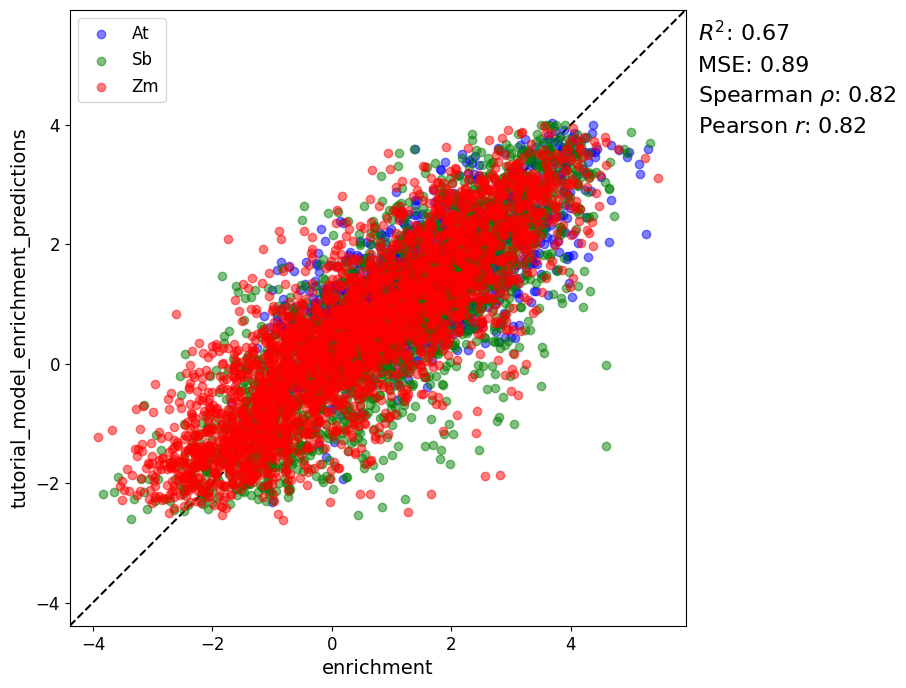

In [66]:
#Model 2
pl.performance_scatter(
    sdata_test,
    target_vars="enrichment",
    prediction_vars="tutorial_model_enrichment_predictions",
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8)
)